In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [437]:
sales = pd.read_csv("videogames_sales.csv")
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [439]:
sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [440]:
#sales.isnull.sum()

In [441]:
#sales['Year'] = sales['Year_of_Release'].astype(int)

# Missing values

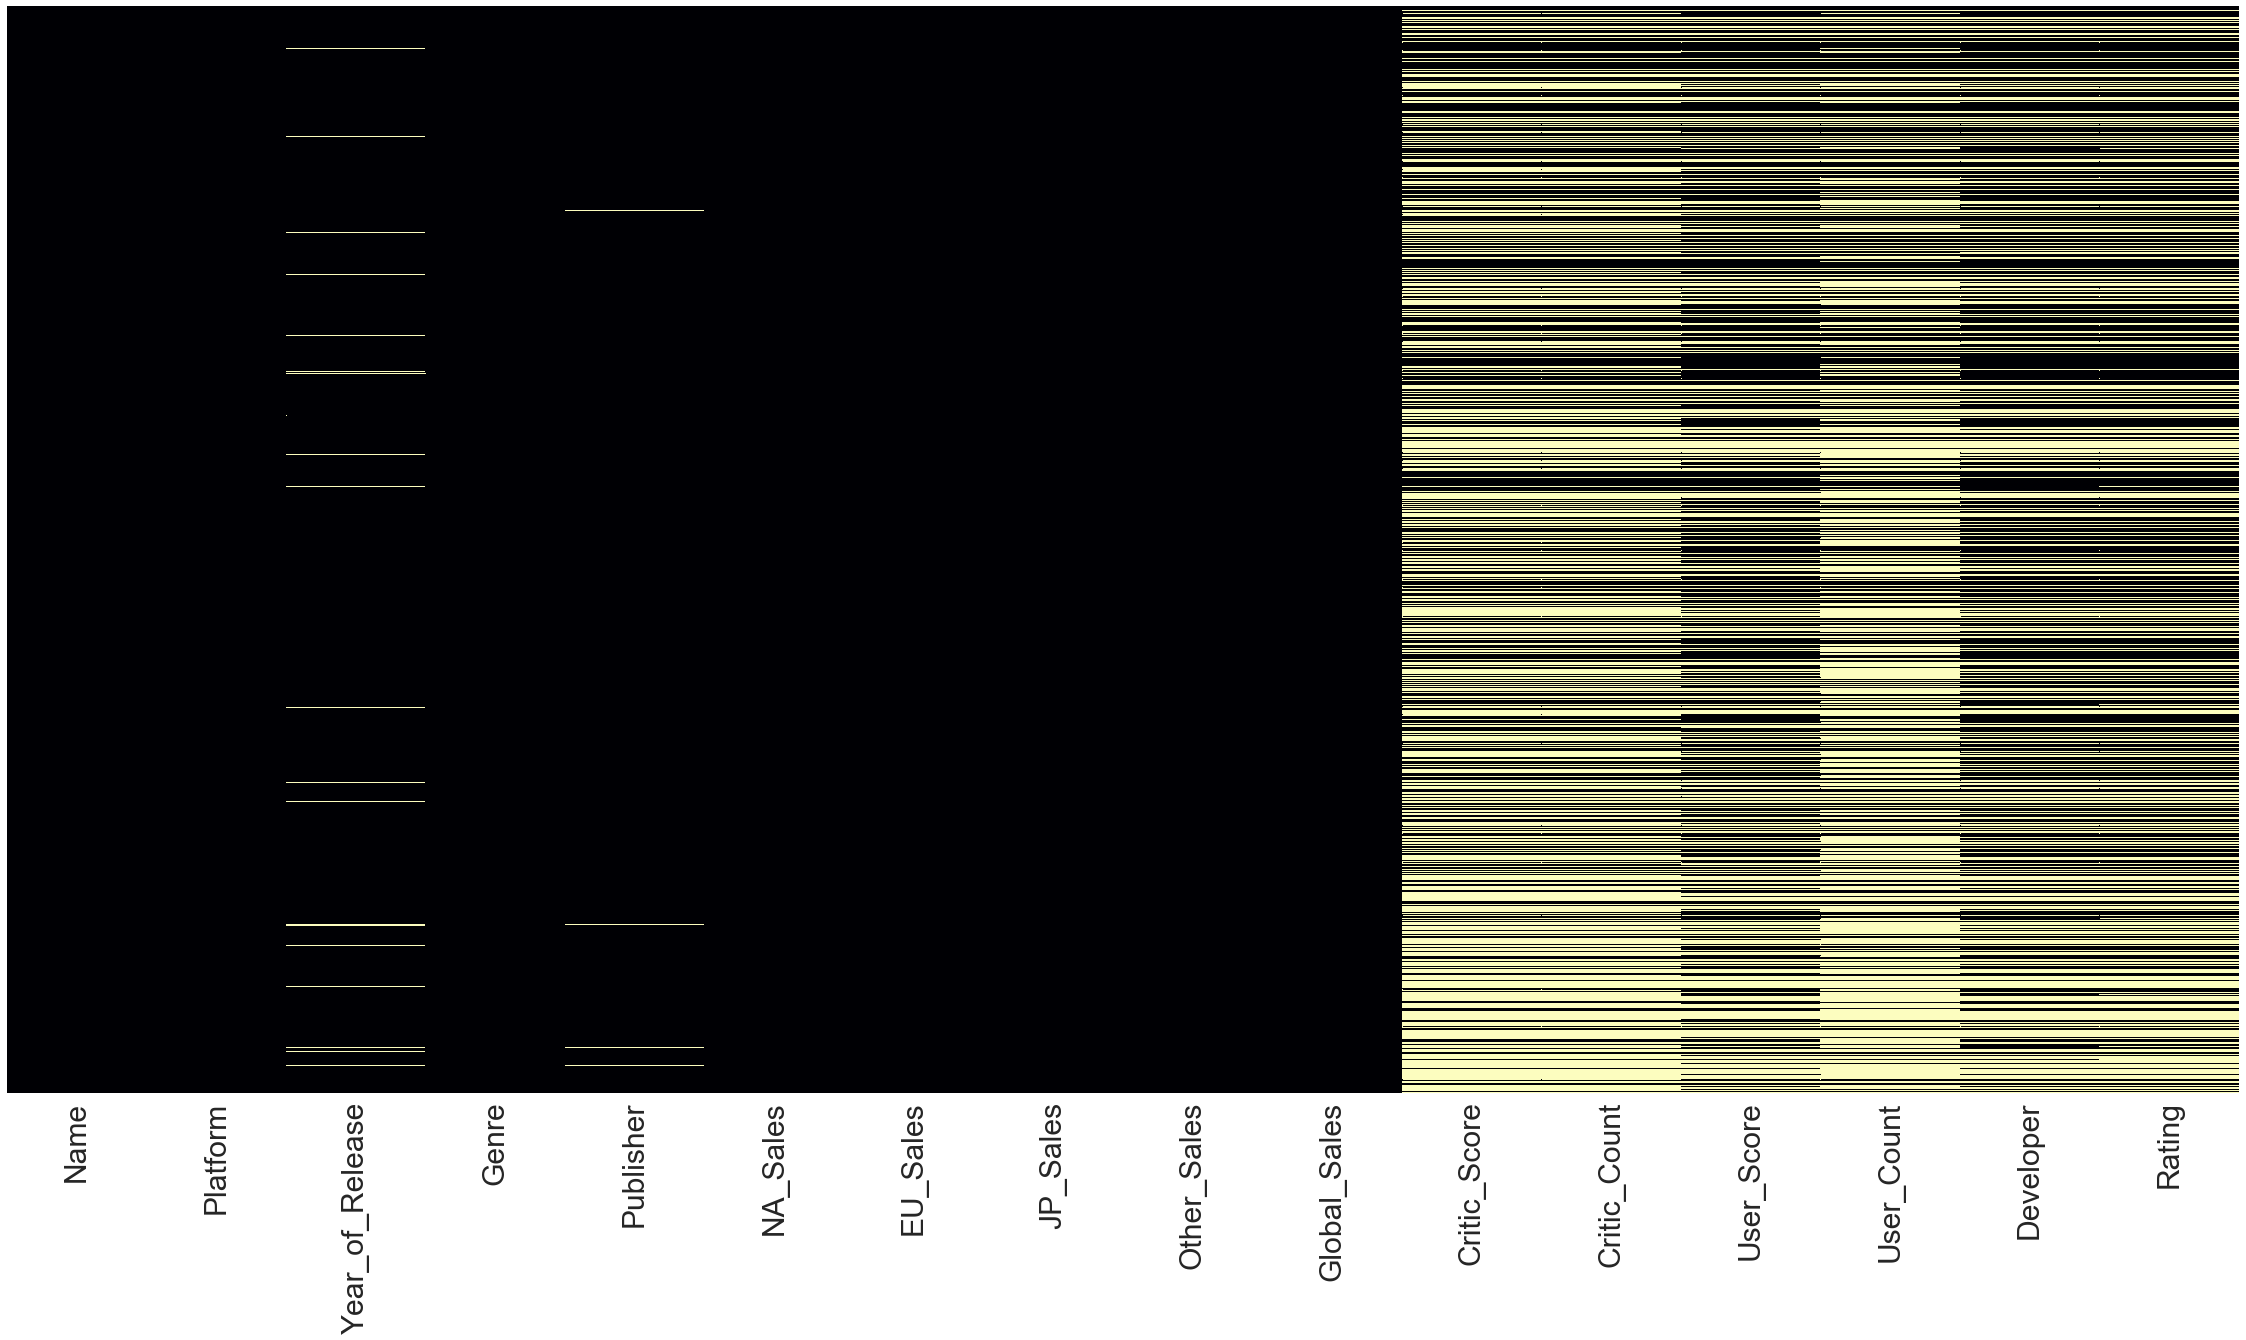

In [442]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [443]:
# plt.figure(figsize=(40,50))
# sns.set(font_scale = 1)
# sns.jointplot(x="Year_of_Release", y="NA_Sales", data=sales,cmap='magma')

In [444]:
sales = sales.dropna()

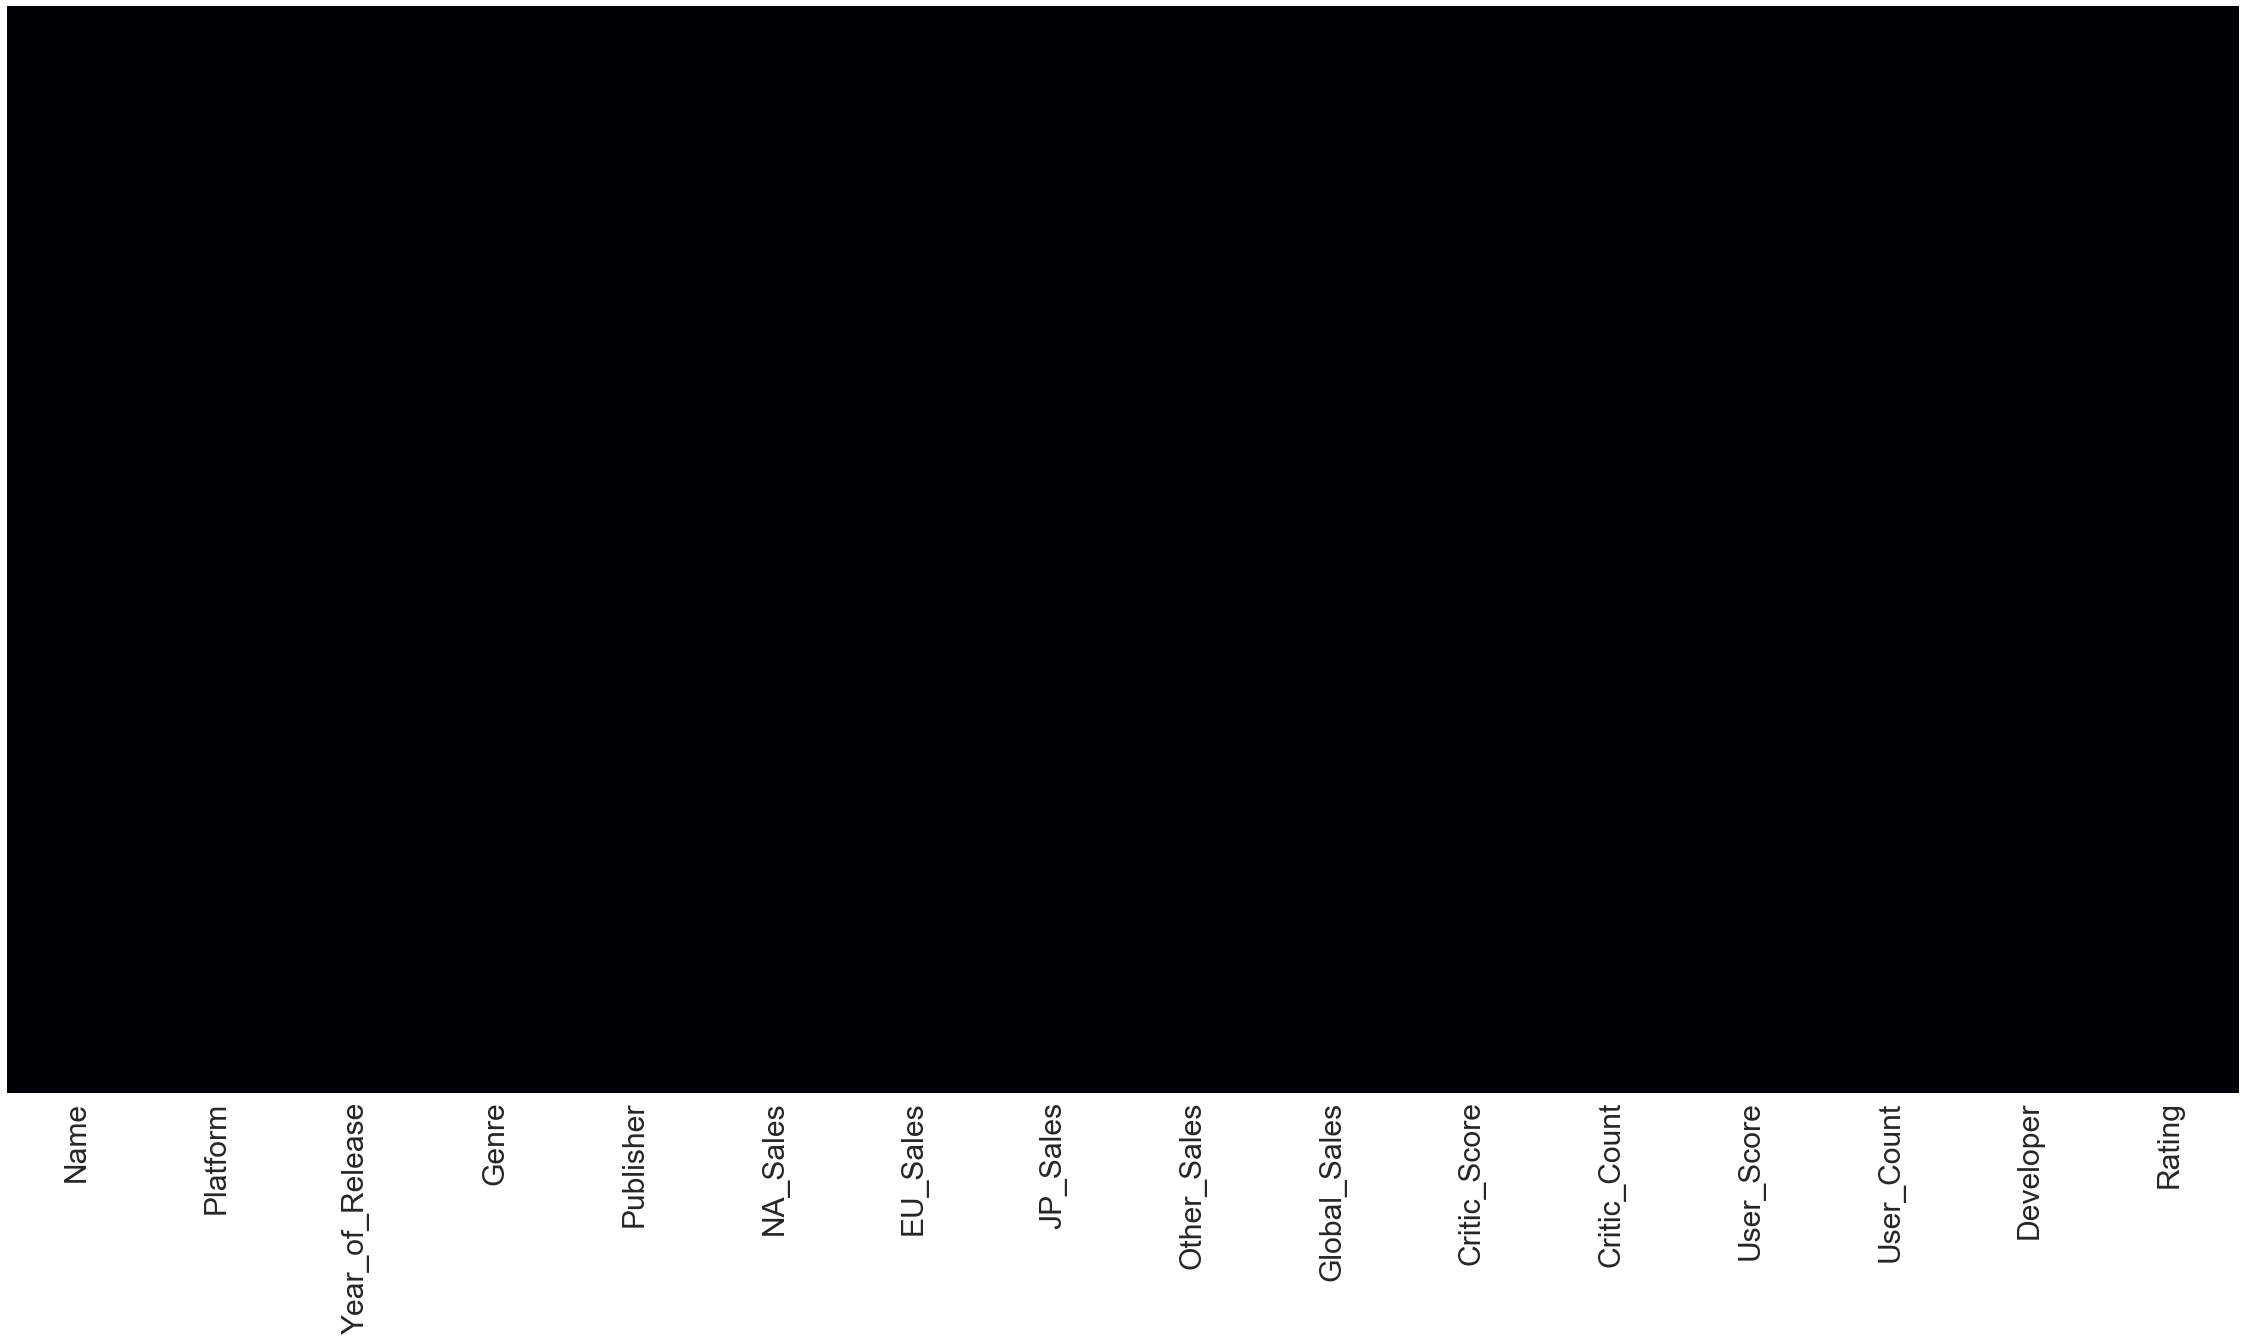

In [445]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='magma')

# EDA
## Most used platforms

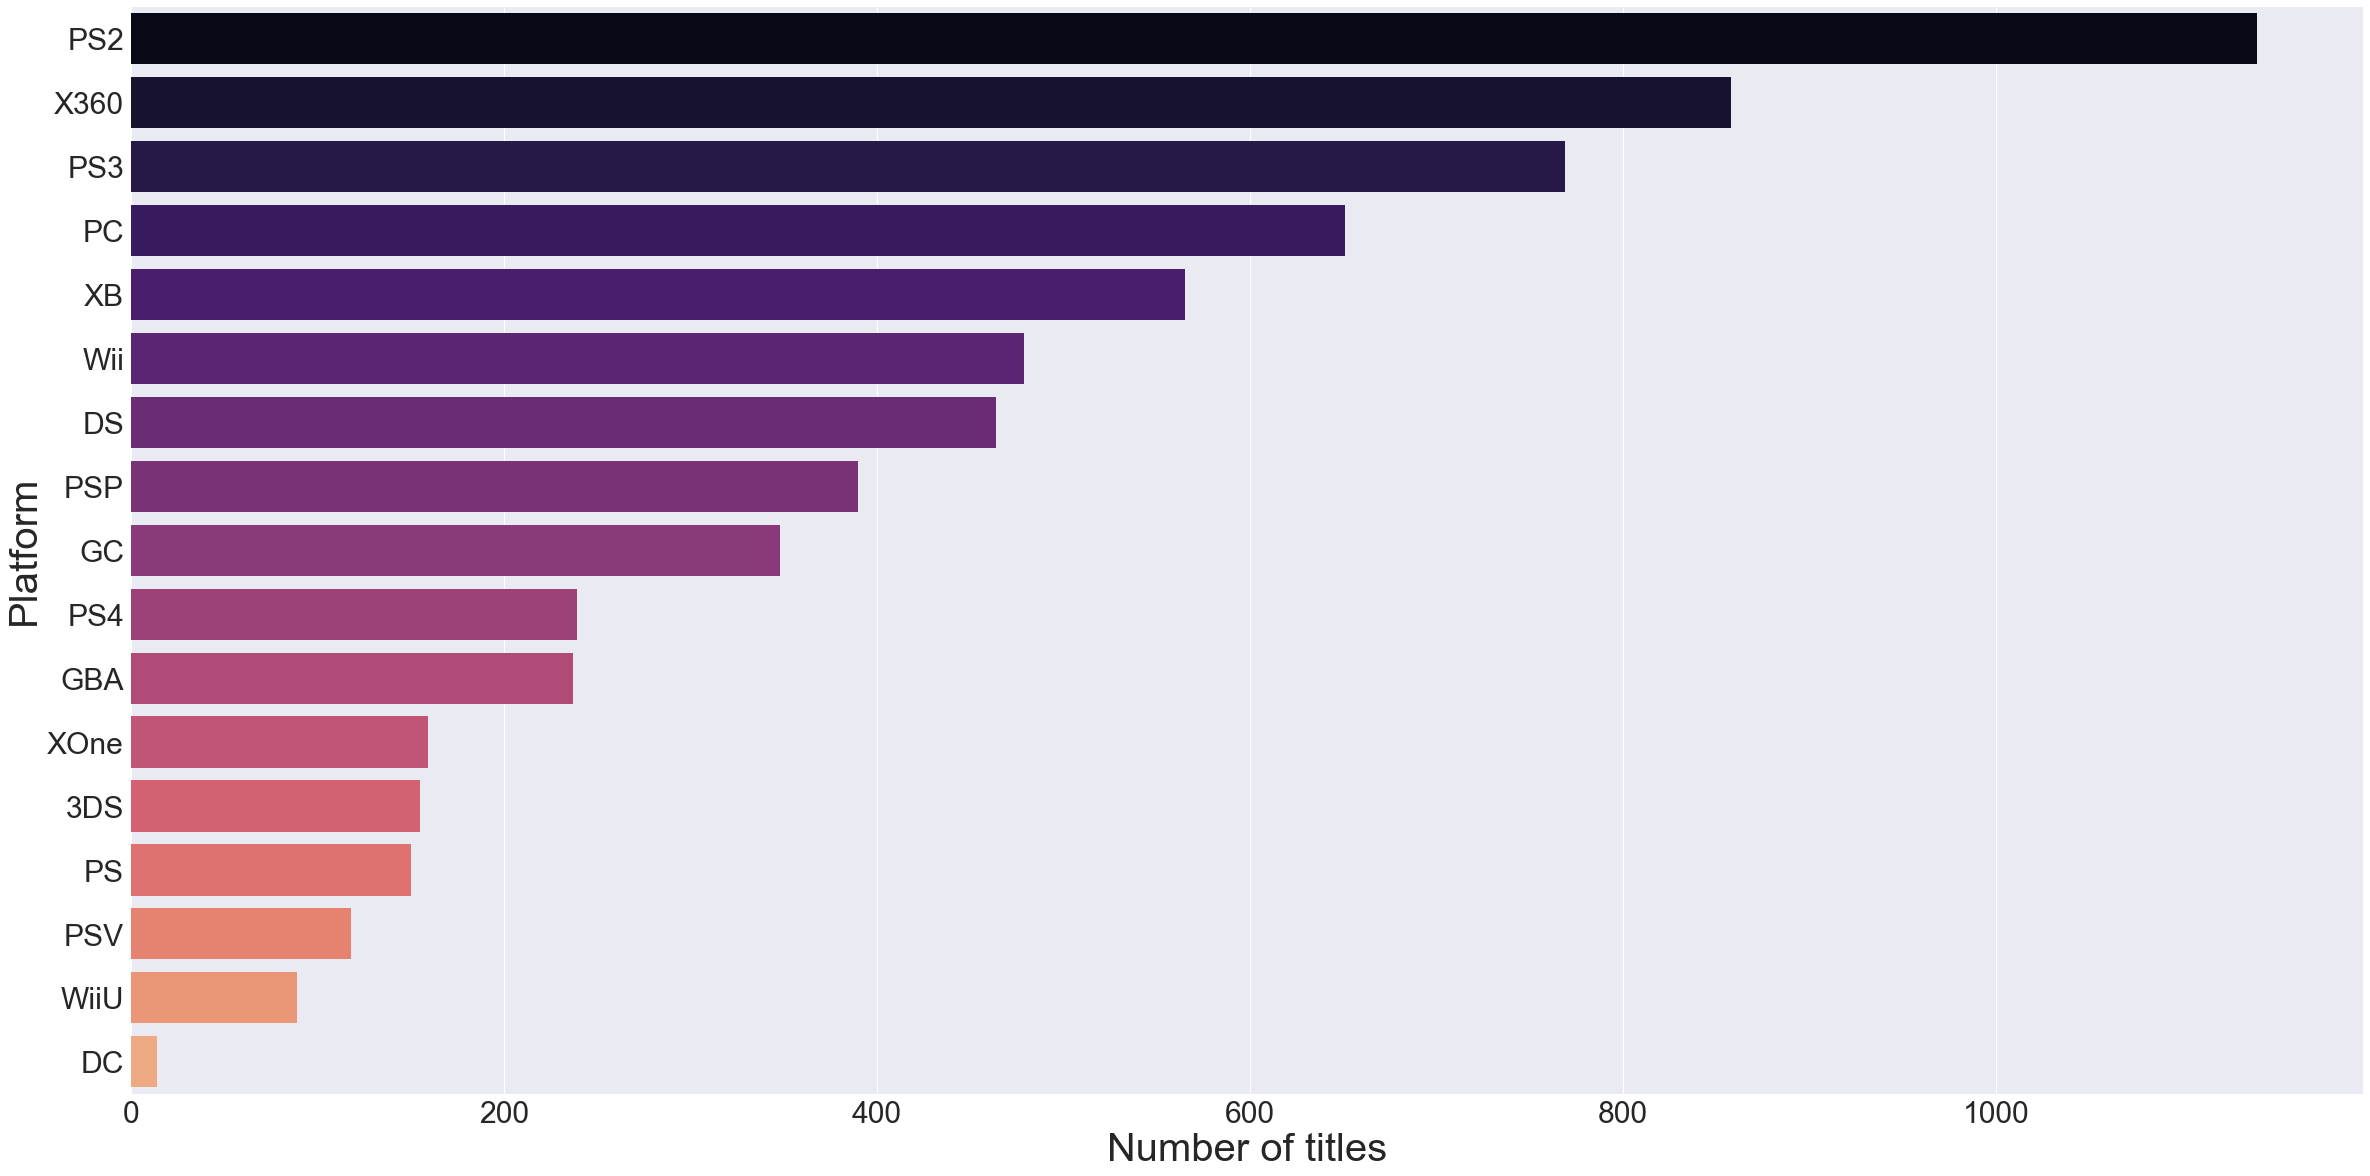

In [459]:
sns.set(font_scale = 3)
platGenre = pd.crosstab(sales.Platform,sales['Genre'])
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(40,20))
colors = sns.color_palette("magma", 20)
ax = sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h', palette=colors)
ax.set_ylabel(ylabel='Platform', fontsize=40)
ax.set_xlabel(xlabel='Number of titles', fontsize=40)
plt.show()

## Popularity of game genres

Text(0.5,0,'Genre')

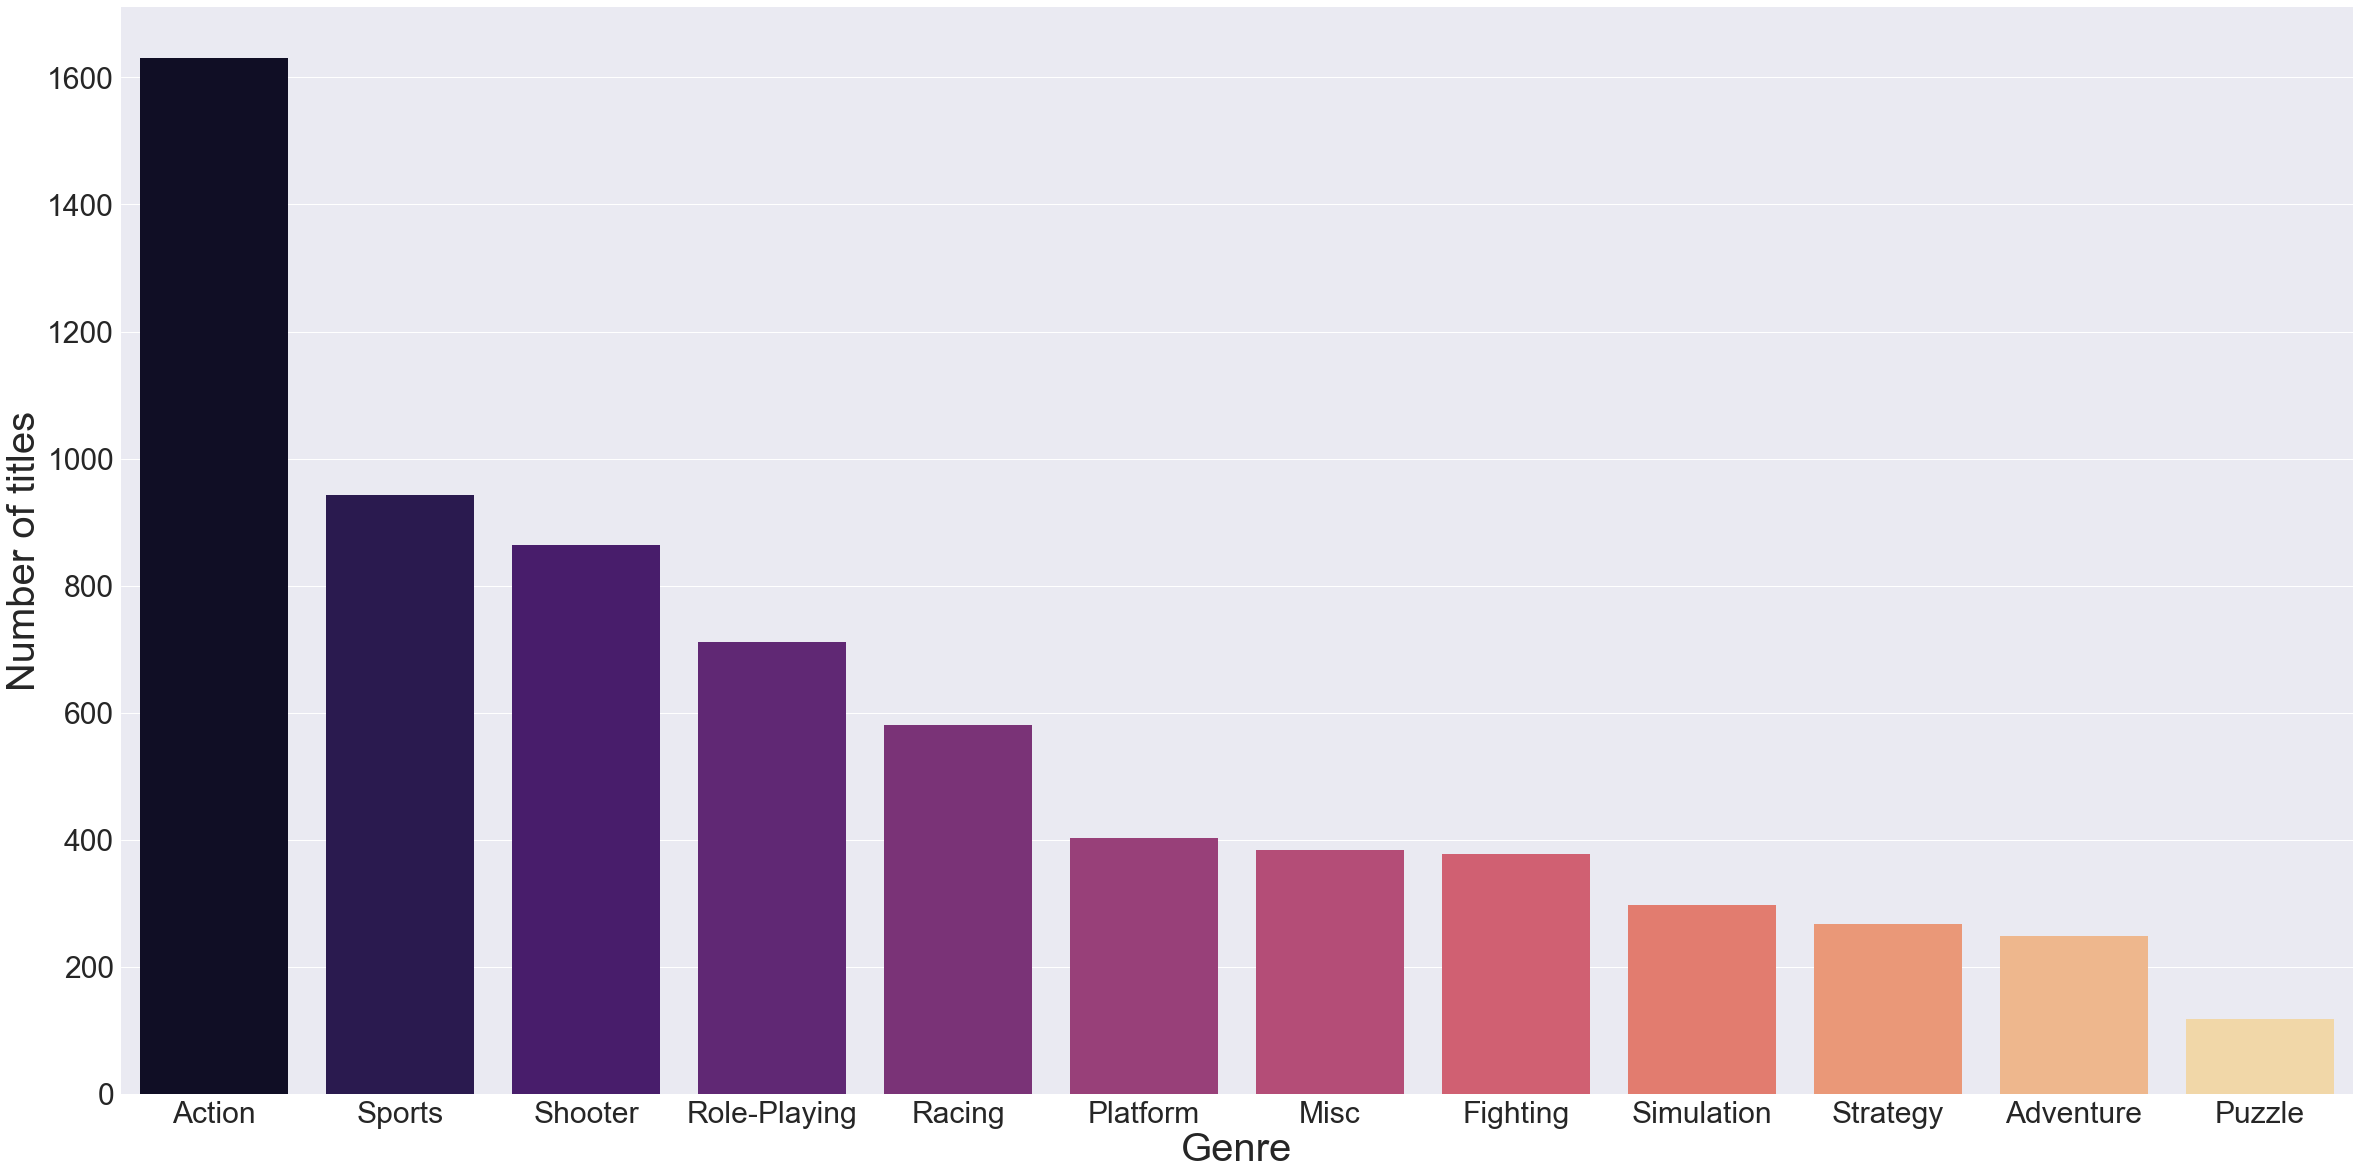

In [458]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
ax = sns.countplot(x='Genre', data=sales, order = sales['Genre'].value_counts().index, palette="magma")
ax.set_ylabel(ylabel='Number of titles', fontsize=40)
ax.set_xlabel(xlabel='Genre', fontsize=40)

## Sales by years

Text(0.5,0,'Year of release')

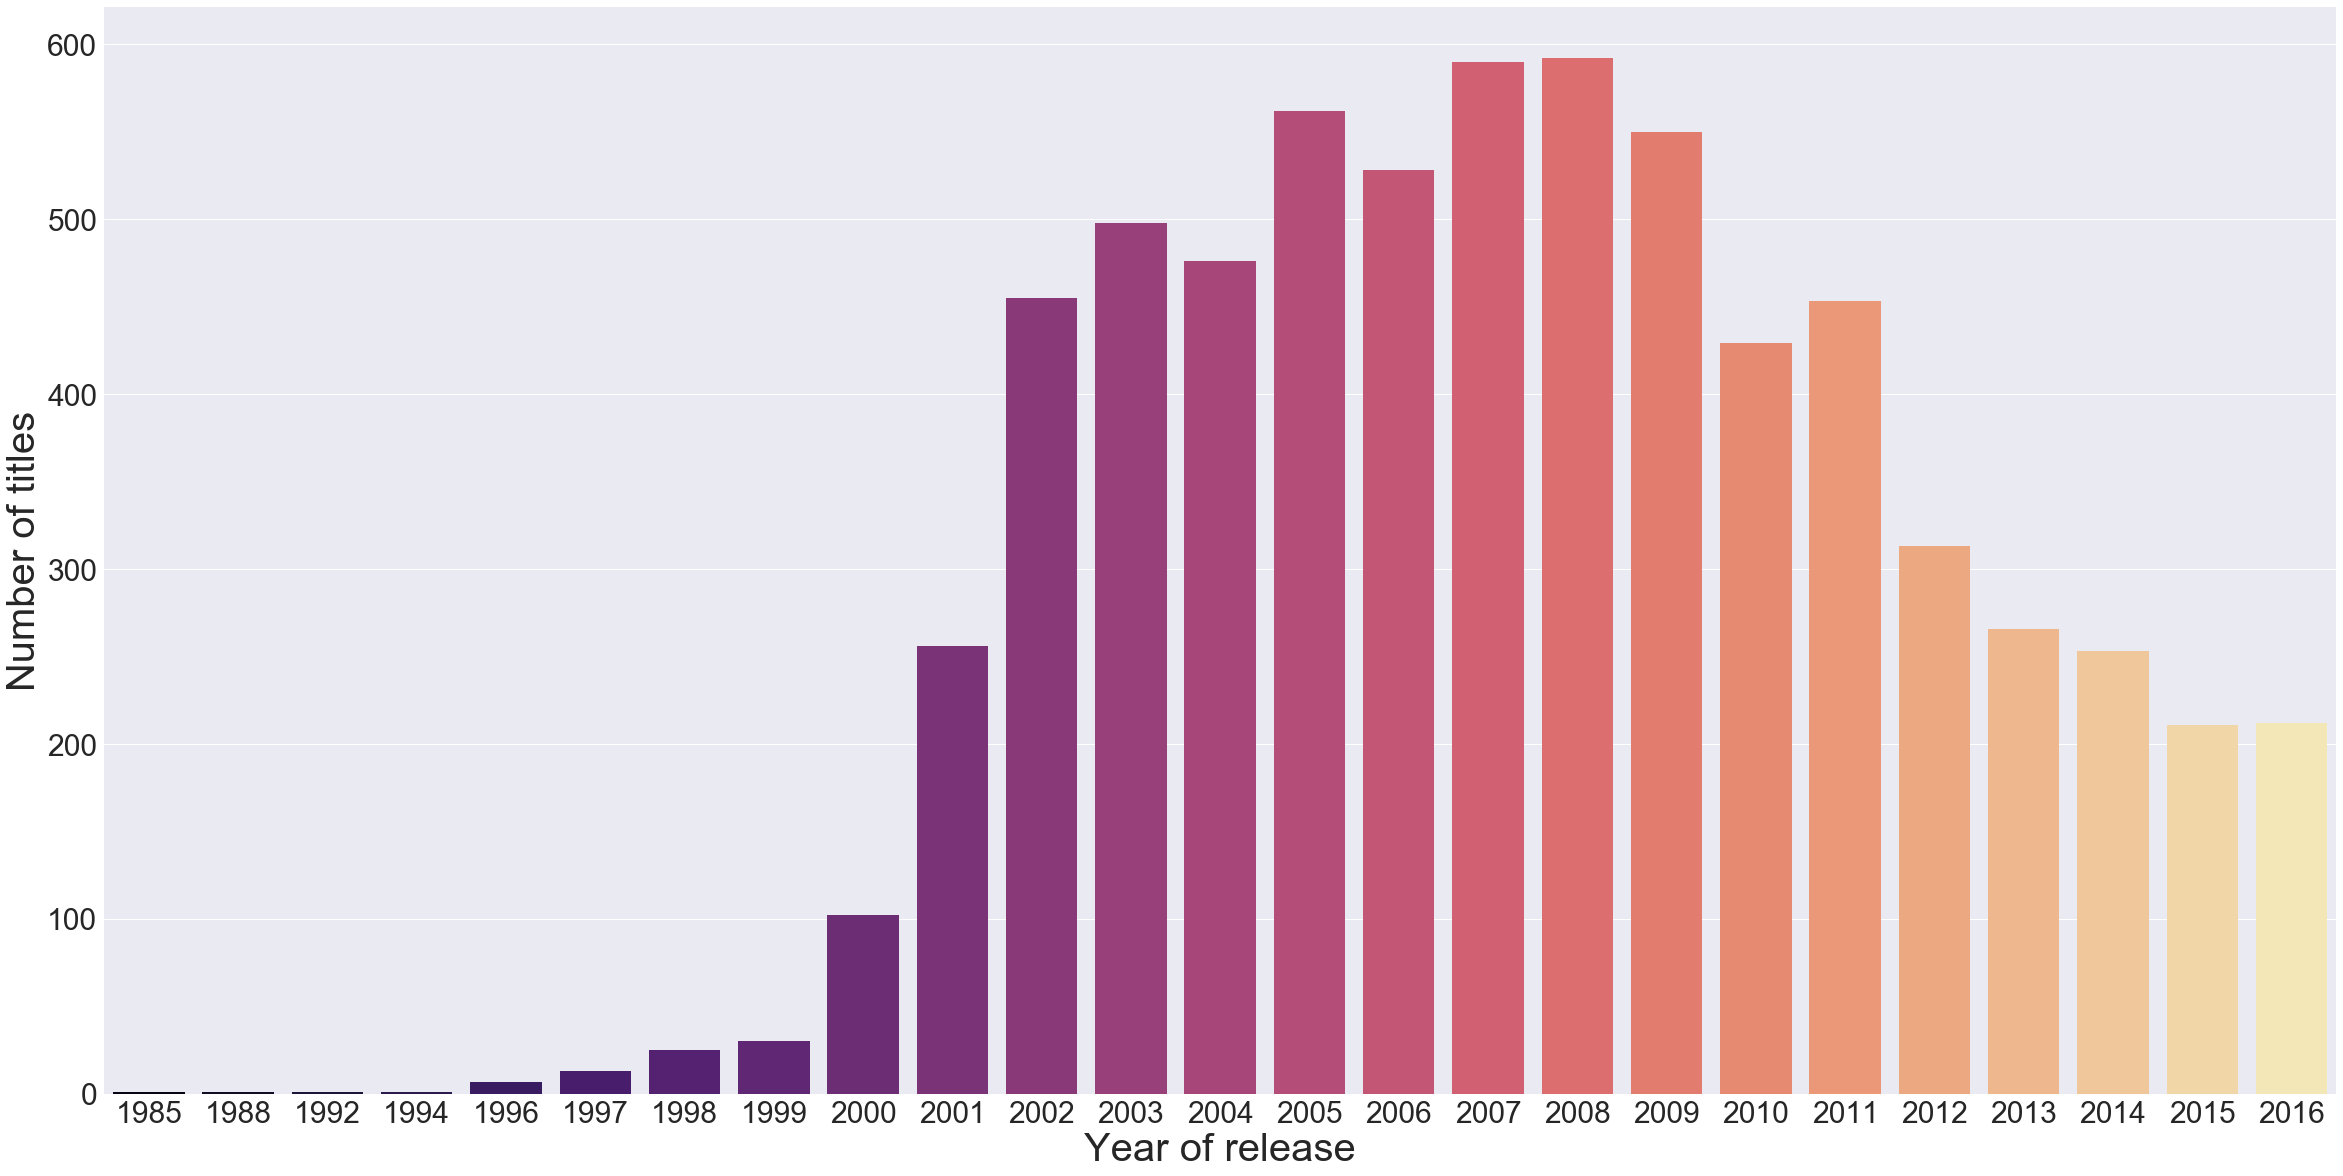

In [457]:
sales['Year_of_Release'] = sales['Year_of_Release'].astype(int)
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
ax = sns.countplot(x='Year_of_Release', data=sales, palette="magma")
ax.set_ylabel(ylabel='Number of titles', fontsize=40)
ax.set_xlabel(xlabel='Year of release', fontsize=40)

## Most common game ratings

Text(0.5,0,'Rating')

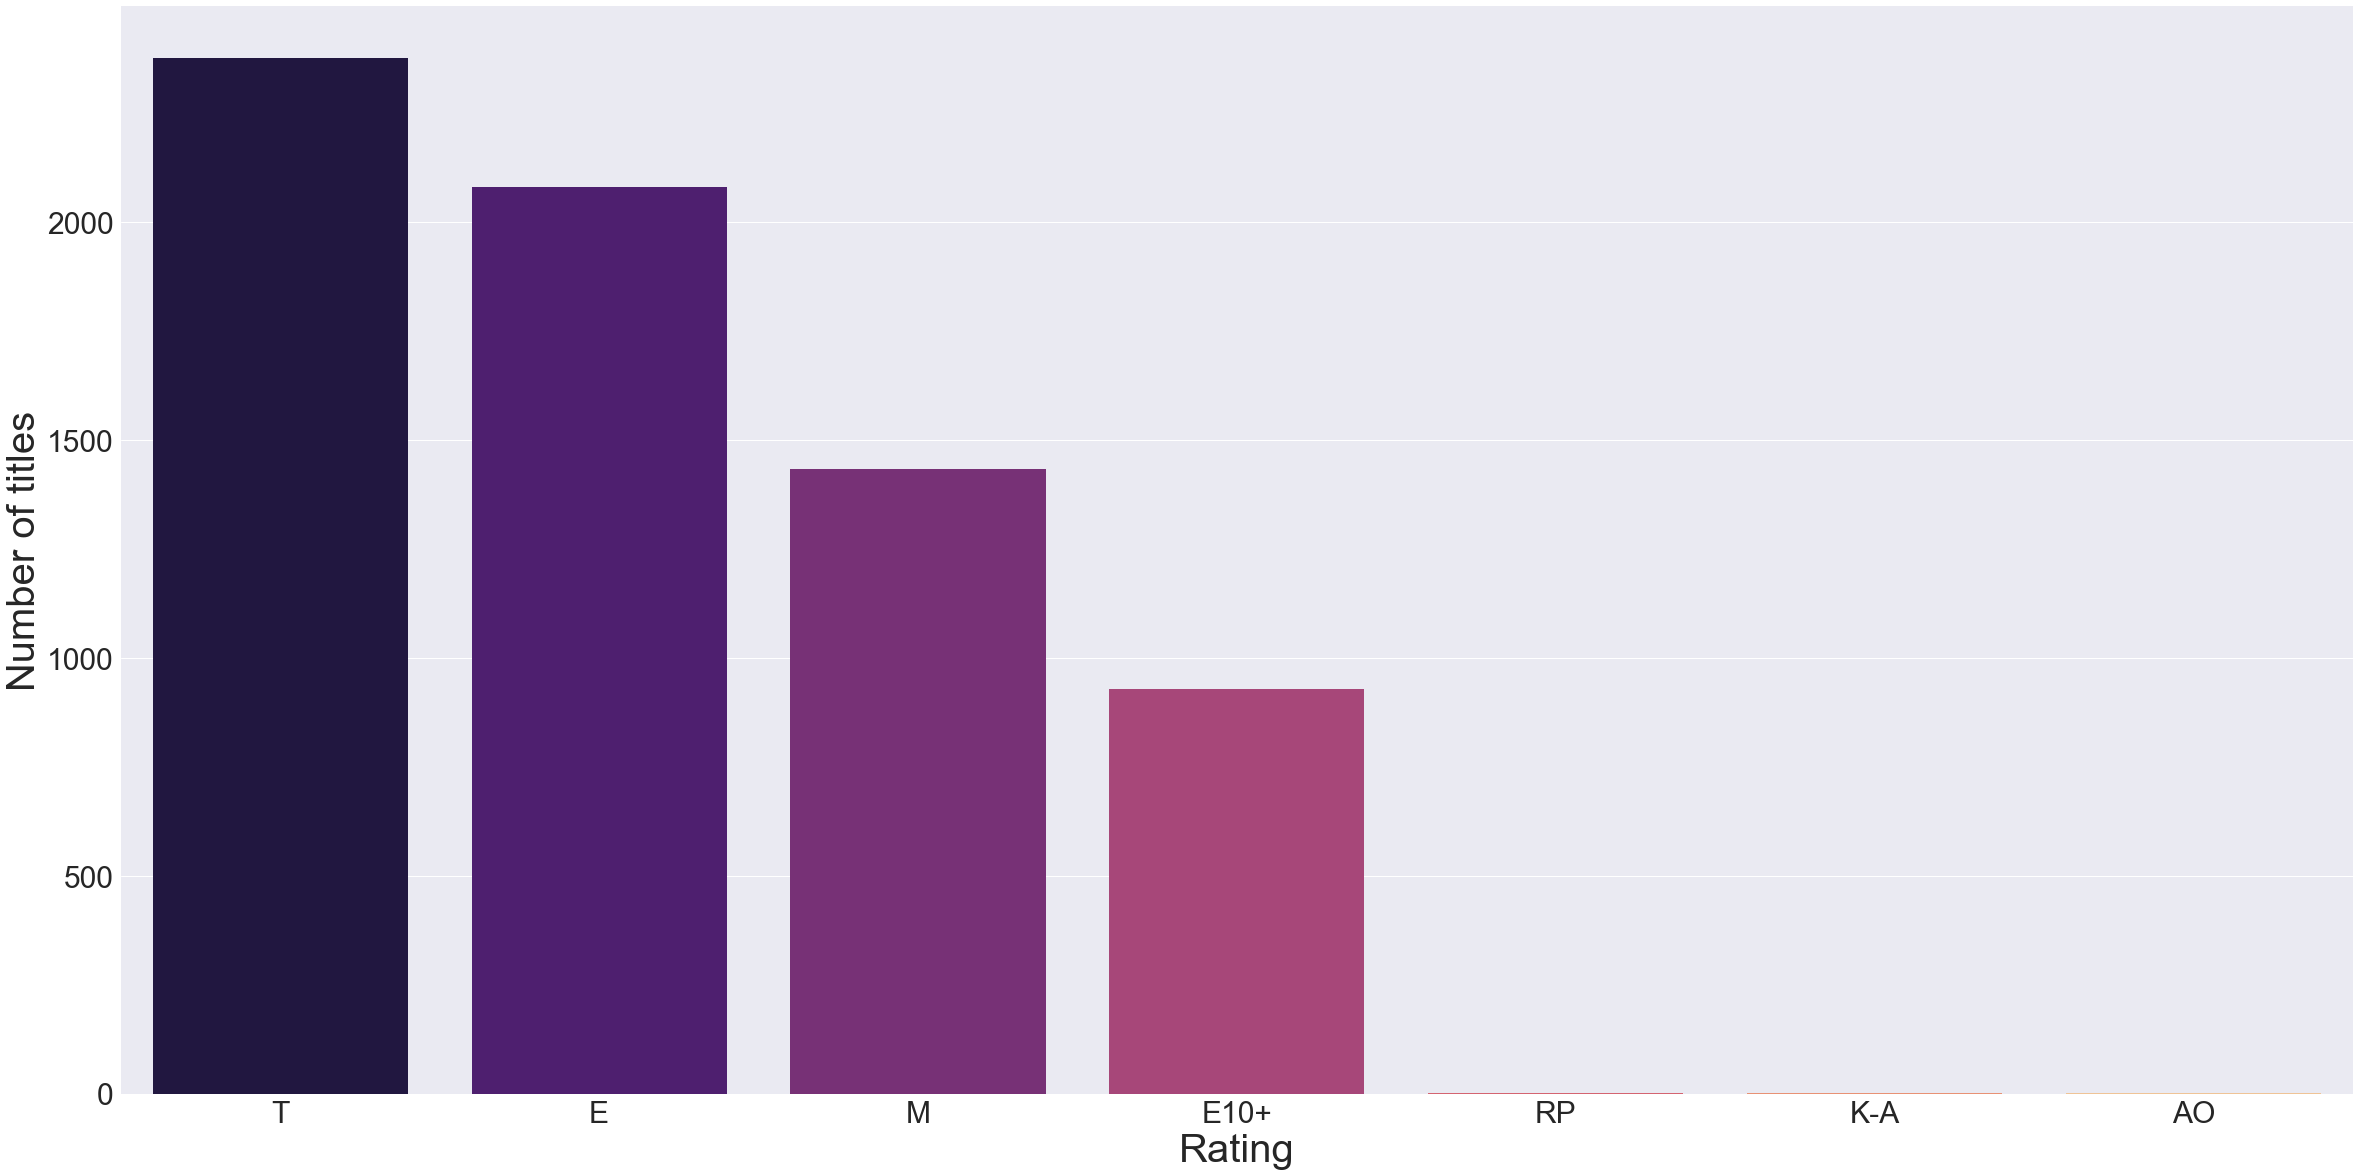

In [460]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
ax = sns.countplot(x='Rating', data=sales, order = sales['Rating'].value_counts().index, palette="magma")
ax.set_ylabel(ylabel='Number of titles', fontsize=40)
ax.set_xlabel(xlabel='Rating', fontsize=40)

In [396]:
# plt.figure(figsize=(40,20))
# # sns.set(font_scale = 3)
# # sns.countplot(x='Publisher', data=sales, order = sales['Publisher'].value_counts().index, palette="magma")
# ax = sns.barplot(x=sales['Publisher'], y=sales['Publisher'].value_counts(), data=sales, estimator=lambda x: len(x) / len(sales) * 100)

## Correlation between attributes

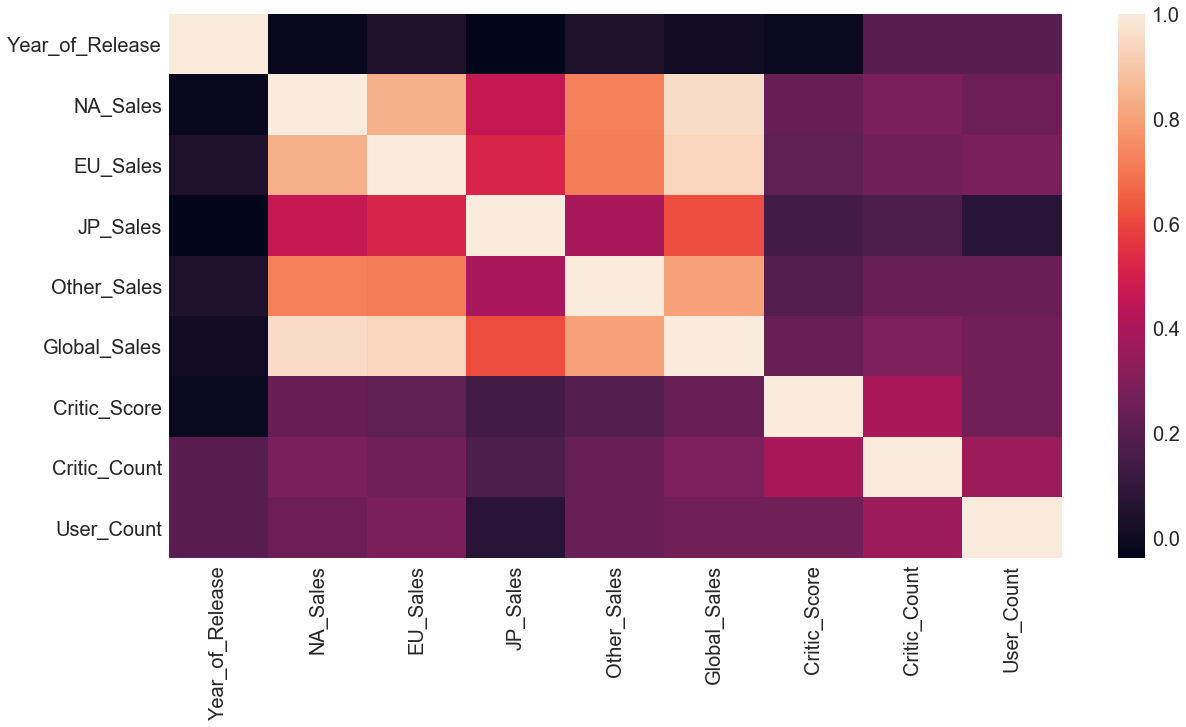

In [397]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.heatmap(sales.corr())

## Top 20 game publishers

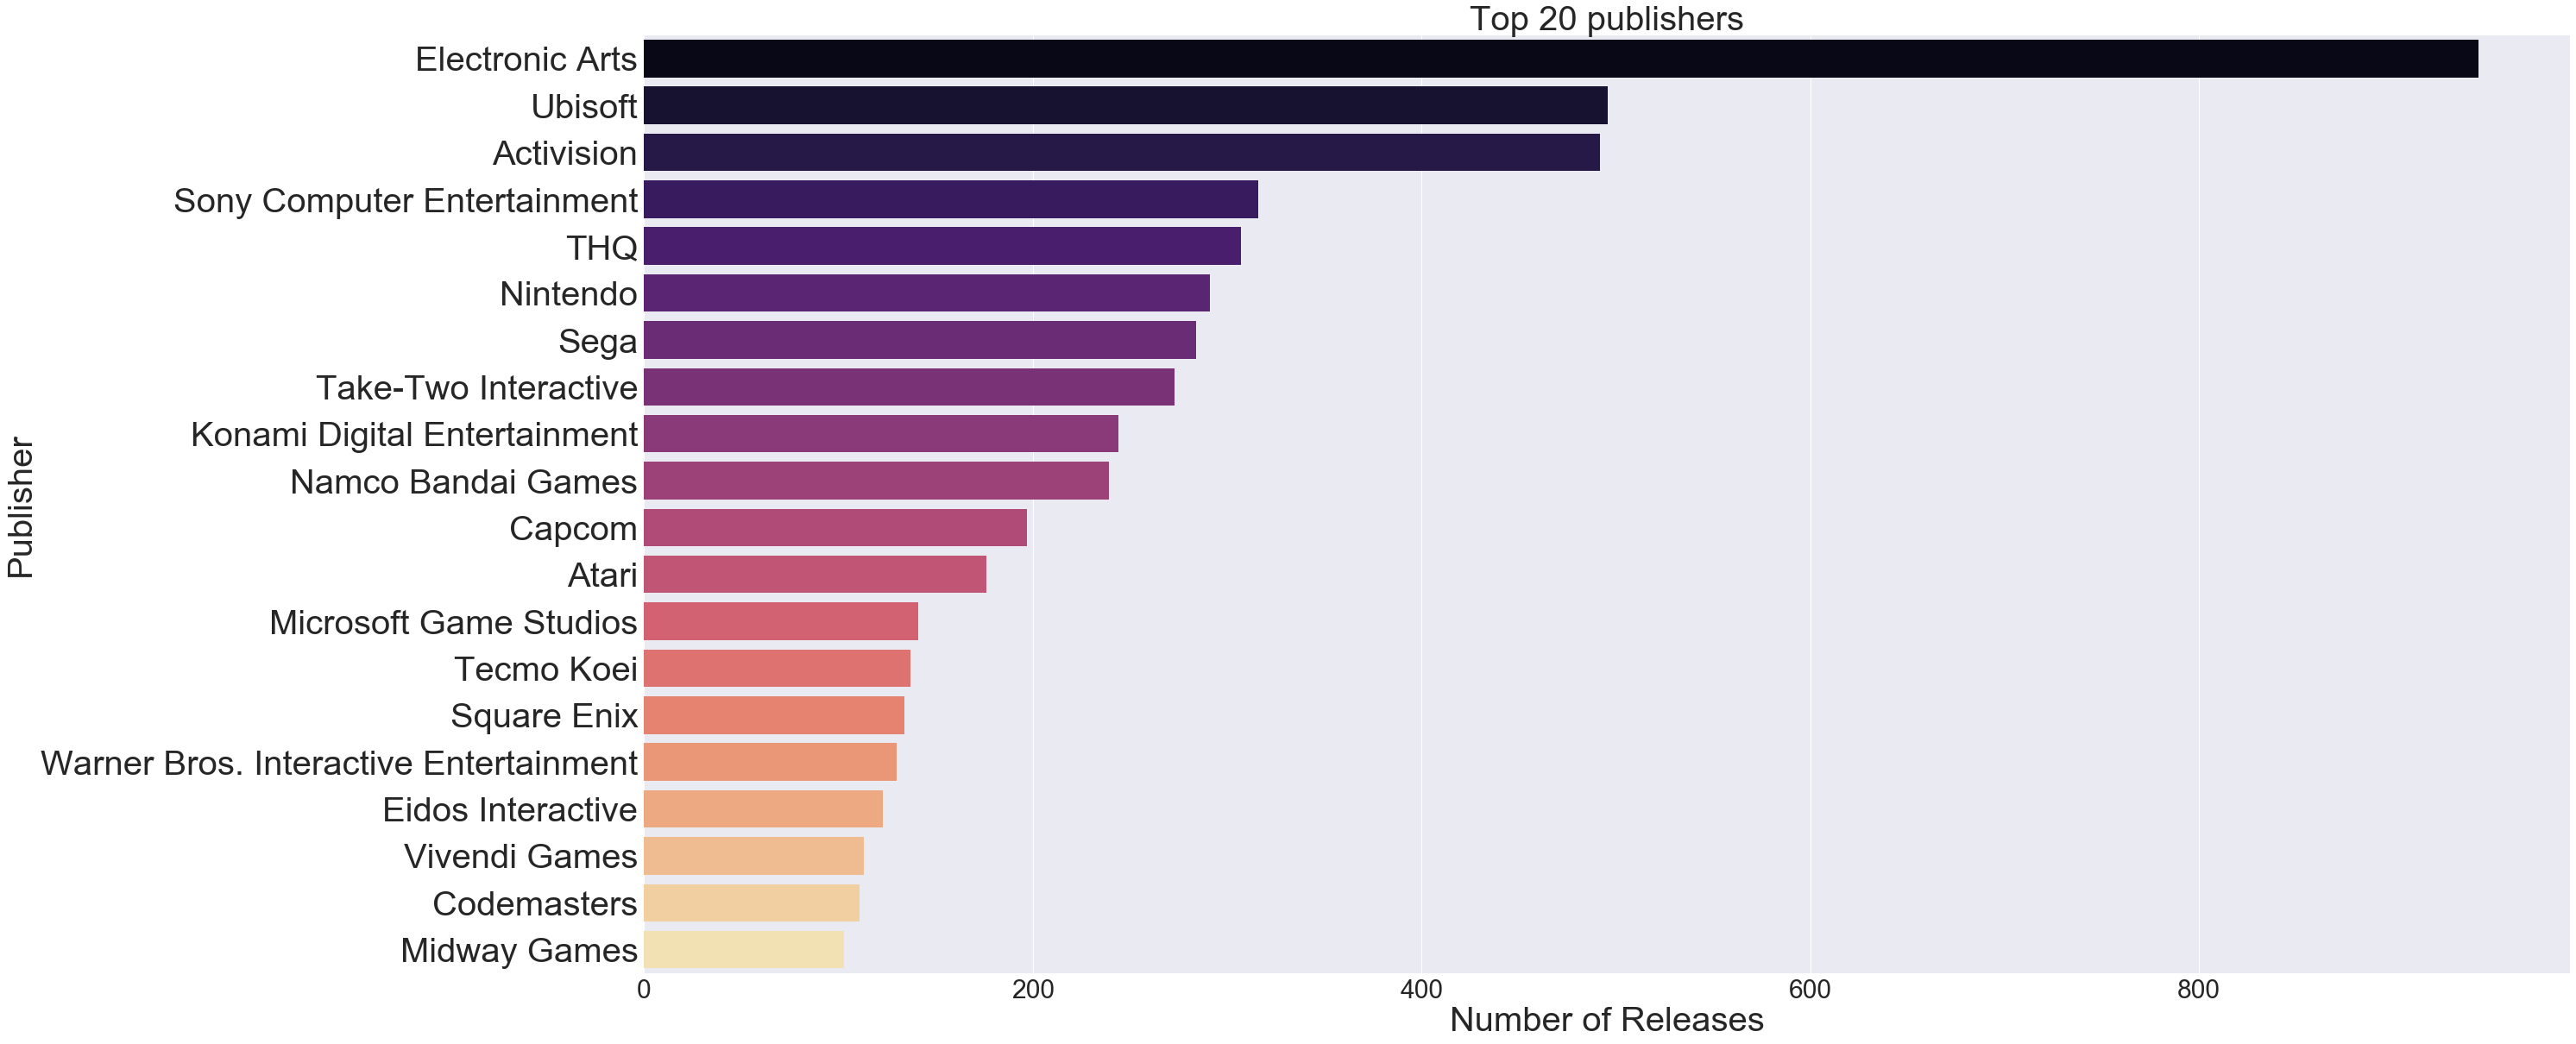

In [468]:
data = sales.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:20]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("magma", len(data))
plt.figure(figsize=(40,20))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=40)
ax.set_ylabel(ylabel='Publisher', fontsize=40)
ax.set_title(label='Top 20 publishers', fontsize=40)
ax.set_yticklabels(labels = publishers, fontsize=40)
plt.show();

## Top 20 game developers

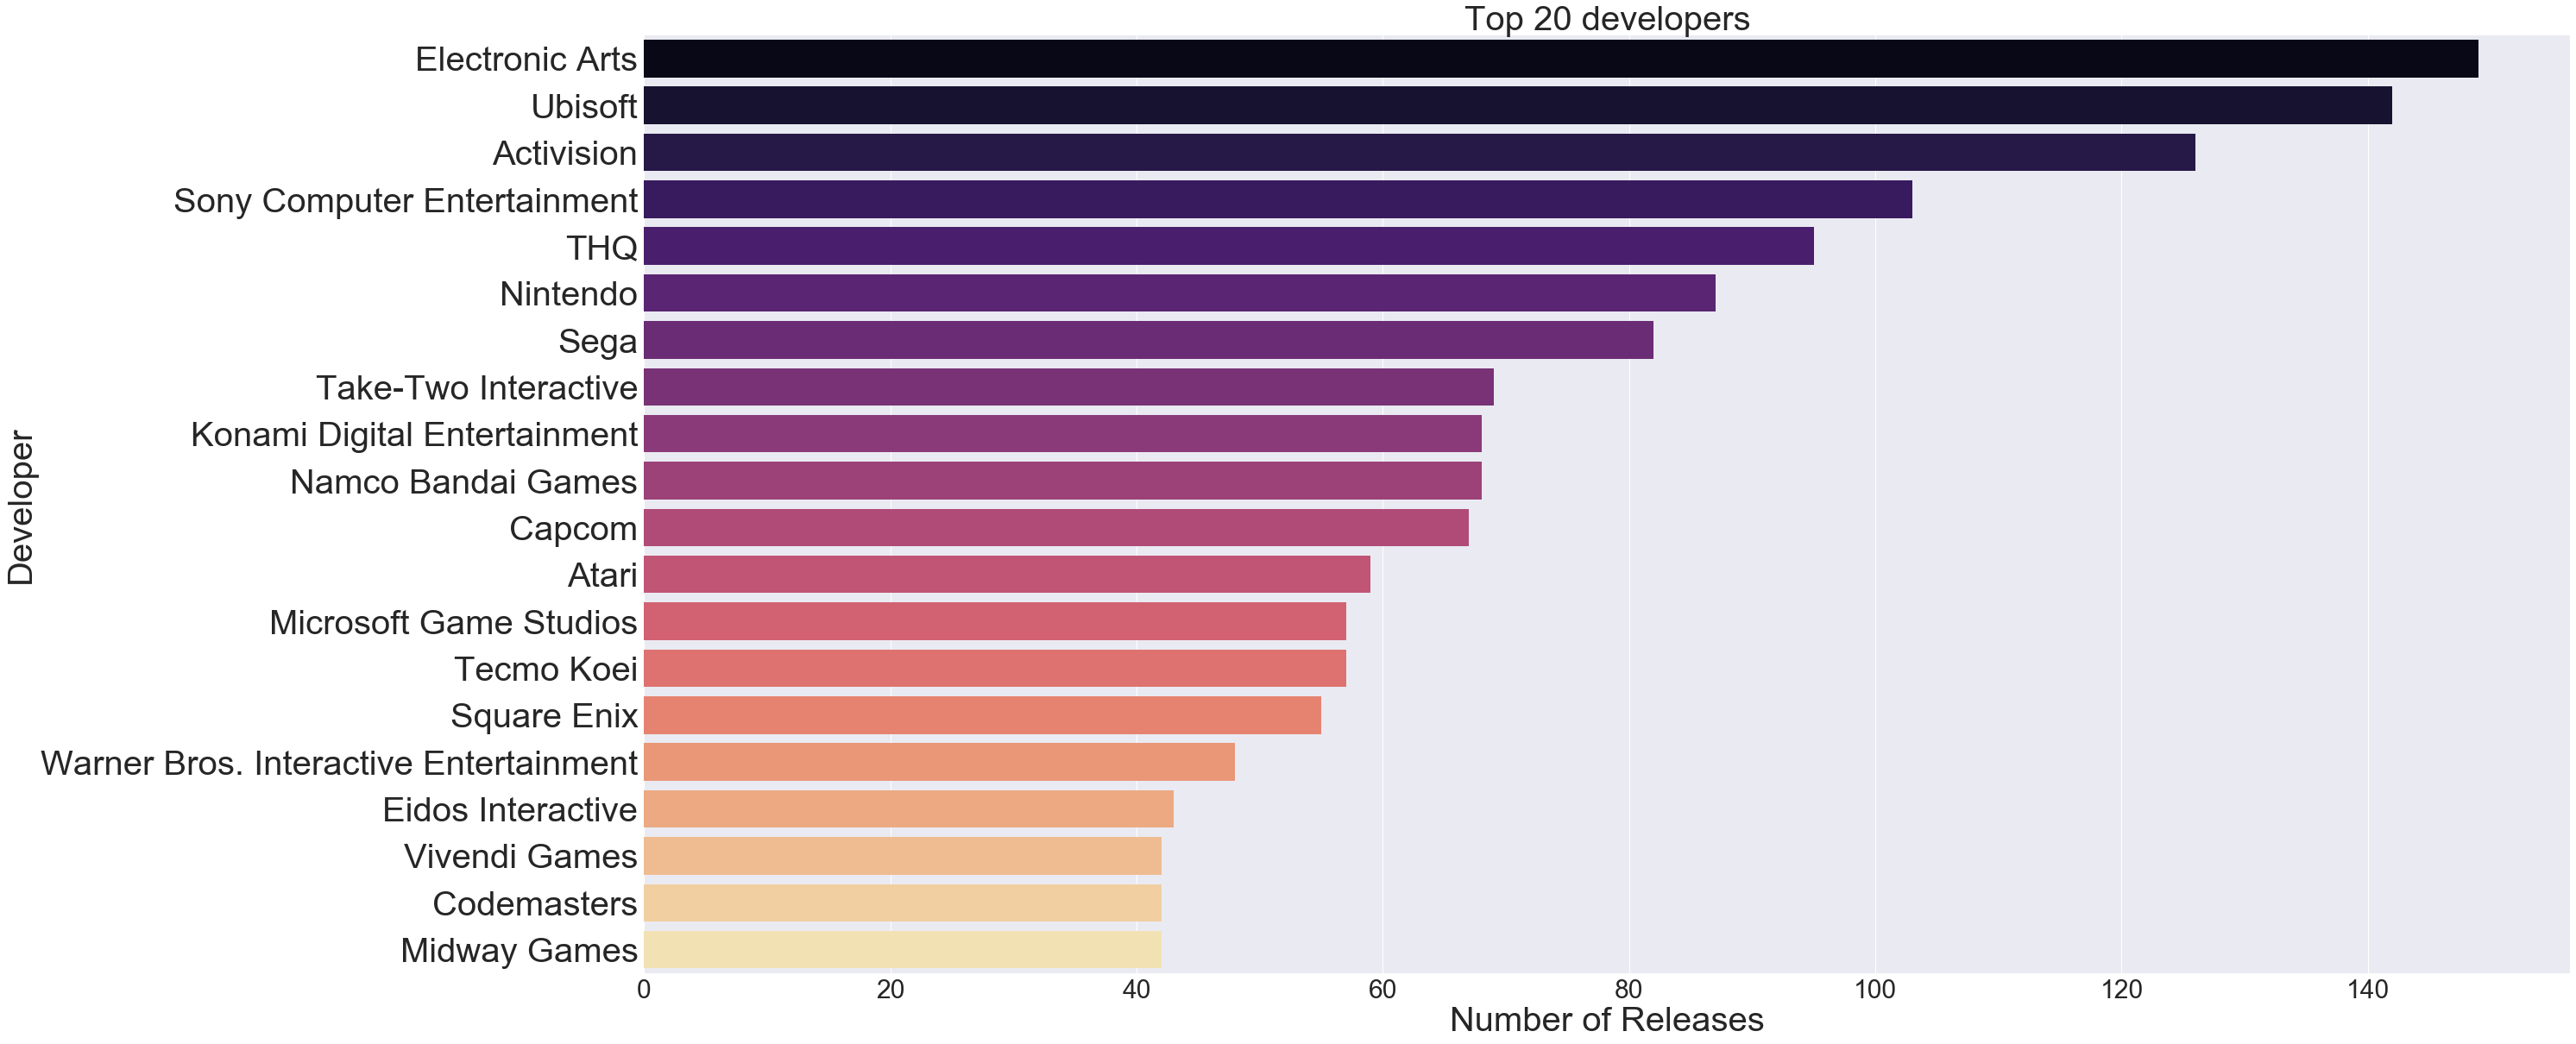

In [469]:
data = sales.groupby(['Developer']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:20]
developers = data.index
data.columns = ['Releases']

colors = sns.color_palette("magma", len(data))
plt.figure(figsize=(40,20))
ax = sns.barplot(y = developers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=40)
ax.set_ylabel(ylabel='Developer', fontsize=40)
ax.set_title(label='Top 20 developers', fontsize=40)
ax.set_yticklabels(labels = publishers, fontsize=40)
plt.show();

# Data pre-processing

In [400]:
# plt.figure(figsize=(50,30))
# sns.countplot(x='Developer',data=sales)
# plt.xticks(rotation=90)

In [401]:
# sales['NA_Sales_quantile'] = pd.qcut(sales['NA_Sales'], 5, labels=["very_low", "low", "medium", "high", "very_high"])

In [402]:
# def createDummies(column, prefix):
#     column_quantiles = pd.qcut(sales[column].rank(method='first'), 5, labels=["very_low", "low", "medium", "high", "very_high"], duplicates='raise')
#     dummies = pd.get_dummies(column_quantiles, prefix=prefix)
#     return dummies

In [403]:
# na_sales_dummies = createDummies('NA_Sales', 'na_sales_')
# eu_sales_dummies = createDummies('EU_Sales', 'eu_sales_')
# jp_sales_dummies = createDummies('JP_Sales', 'jp_sales_')
# other_sales_dummies = createDummies('Other_Sales', 'other_sales_')
# global_sales_dummies = createDummies('Global_Sales', 'global_sales_')
# critic_score_dummies = createDummies('Critic_Score', 'critic_score_')
# critic_count_dummies = createDummies('Critic_Count', 'critic_count_')
# user_score_dummies = createDummies('User_Score', 'user_score_')
# user_count_dummies = createDummies('User_Count', 'user_count_')
# sales = pd.concat([sales, critic_score_dummies, critic_count_dummies, user_count_dummies], axis=1)
# sales = pd.concat([sales, na_sales_dummies,eu_sales_dummies,jp_sales_dummies, other_sales_dummies, global_sales_dummies], axis=1)
# sales = sales.drop(['Critic_Score', 'Critic_Count', 'User_Count'], axis=1)
# sales = sales.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)

In [404]:
# sales.head()

In [405]:
# sales.info()

## Rating

In [406]:
sales['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

In [407]:
sales['Rating'].replace('E10+', 'E10plus',inplace=True)
sales['Rating'].replace('K-A', 'KA',inplace=True)
sales['Rating'] = sales['Rating'].str.lower()
sales['Rating'].unique()

array(['e', 'm', 't', 'e10plus', 'ao', 'ka', 'rp'], dtype=object)

In [408]:
dummies = pd.get_dummies(sales['Rating'], prefix='rating_')
sales = pd.concat([sales, dummies], axis=1)
sales = sales.drop(['Rating'], axis=1)

## Genre

In [409]:
sales['Genre'].nunique()
sales['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [410]:
sales['Genre'] = sales['Genre'].str.lower()
dummies = pd.get_dummies(sales['Genre'], prefix='genre_')
sales = pd.concat([sales, dummies], axis=1)
sales = sales.drop(['Genre'], axis=1)

## Publisher

In [411]:
counts = pd.value_counts(sales['Publisher'])
mask = sales['Publisher'].isin(counts[counts >= 100].index)
dummy_other = sales['Publisher'].isin(counts[counts < 100].index)
dummies = pd.get_dummies(sales['Publisher'][mask], prefix='publisher')
sales['publisher_other'] = dummy_other.astype(int)
sales = pd.concat([sales, dummies], axis=1)
sales = sales.drop(['Publisher'], axis=1)

## Developer

In [412]:
counts = pd.value_counts(sales['Developer'])
mask = sales['Developer'].isin(counts[counts >= 50].index)
dummy_other = sales['Developer'].isin(counts[counts < 50].index)
dummies = pd.get_dummies(sales['Developer'][mask], prefix='developer')
sales['developer_other'] = dummy_other.astype(int)
sales = pd.concat([sales, dummies], axis=1)
sales = sales.drop(['Developer'], axis=1)

In [413]:
# with pd.option_context('display.max_columns', None):
#     print(sales)

## Platform

In [414]:
counts = pd.value_counts(sales['Platform'])
mask = sales['Platform'].isin(counts[counts >= 50].index)
dummy_other = sales['Platform'].isin(counts[counts < 50].index)
dummies = pd.get_dummies(sales['Platform'][mask], prefix='platform')
sales['platform_other'] = dummy_other.astype(int)
sales = pd.concat([sales, dummies], axis=1)
sales = sales.drop(['Platform'], axis=1)

## Year

In [415]:
years = list(range(2000, 2017))
mask = sales['Year_of_Release'].isin(years)
dummies = pd.get_dummies(sales['Year_of_Release'][mask], prefix='year')
sales['year_other'] = ~mask.astype(int)
sales = pd.concat([sales, dummies], axis=1)

In [416]:
sales = sales.fillna(0)
columns = list(sales.columns)[10:]
for column in columns:
    sales[column] = sales[column].astype(int)
sales['Critic_Count'] = sales['Critic_Count'].astype(int)

In [417]:
train = sales.drop(['Name', 'Year_of_Release', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
train['NA_Sales'] = train['NA_Sales'].apply(lambda x: x*100).astype(int)

In [418]:
train.head()

,NA_Sales,Critic_Score,Critic_Count,User_Score,User_Count,rating__ao,rating__e,rating__e10plus,rating__ka,rating__m,...,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,4136,76.0,51,8,322,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1568,82.0,73,8.3,709,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1561,80.0,73,8,192,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1128,89.0,65,8.5,431,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1396,58.0,41,6.6,129,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [419]:
# from sklearn import preprocessing
# from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(train)
# train_norm = scaler.transform(train)
# df_normalized = pd.DataFrame(train_norm)
# df_normalized

In [420]:
columns = list(train)
columns.remove('NA_Sales')

In [421]:
X = sales[columns]
y = sales['NA_Sales']

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [424]:
from sklearn.linear_model import LinearRegression

In [425]:
lm = LinearRegression()

In [426]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [427]:
print(lm.intercept_)

0.6284677824416318


In [428]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Critic_Score,1.139144e-02
Critic_Count,6.473056e-03
User_Score,-3.956945e-02
User_Count,4.358263e-04
rating__ao,1.742634e-13
rating__e,-4.628082e-02
rating__e10plus,-1.745974e-01
rating__ka,-3.191891e-14
rating__m,-9.345819e-02
rating__rp,4.762492e-01


In [429]:
predictions = lm.predict(X_test)

In [430]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.35594527407703314
MSE: 0.8765463440717992
RMSE: 0.9362405375072151


In [431]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)

Text(0.5,1,'NA Sales')

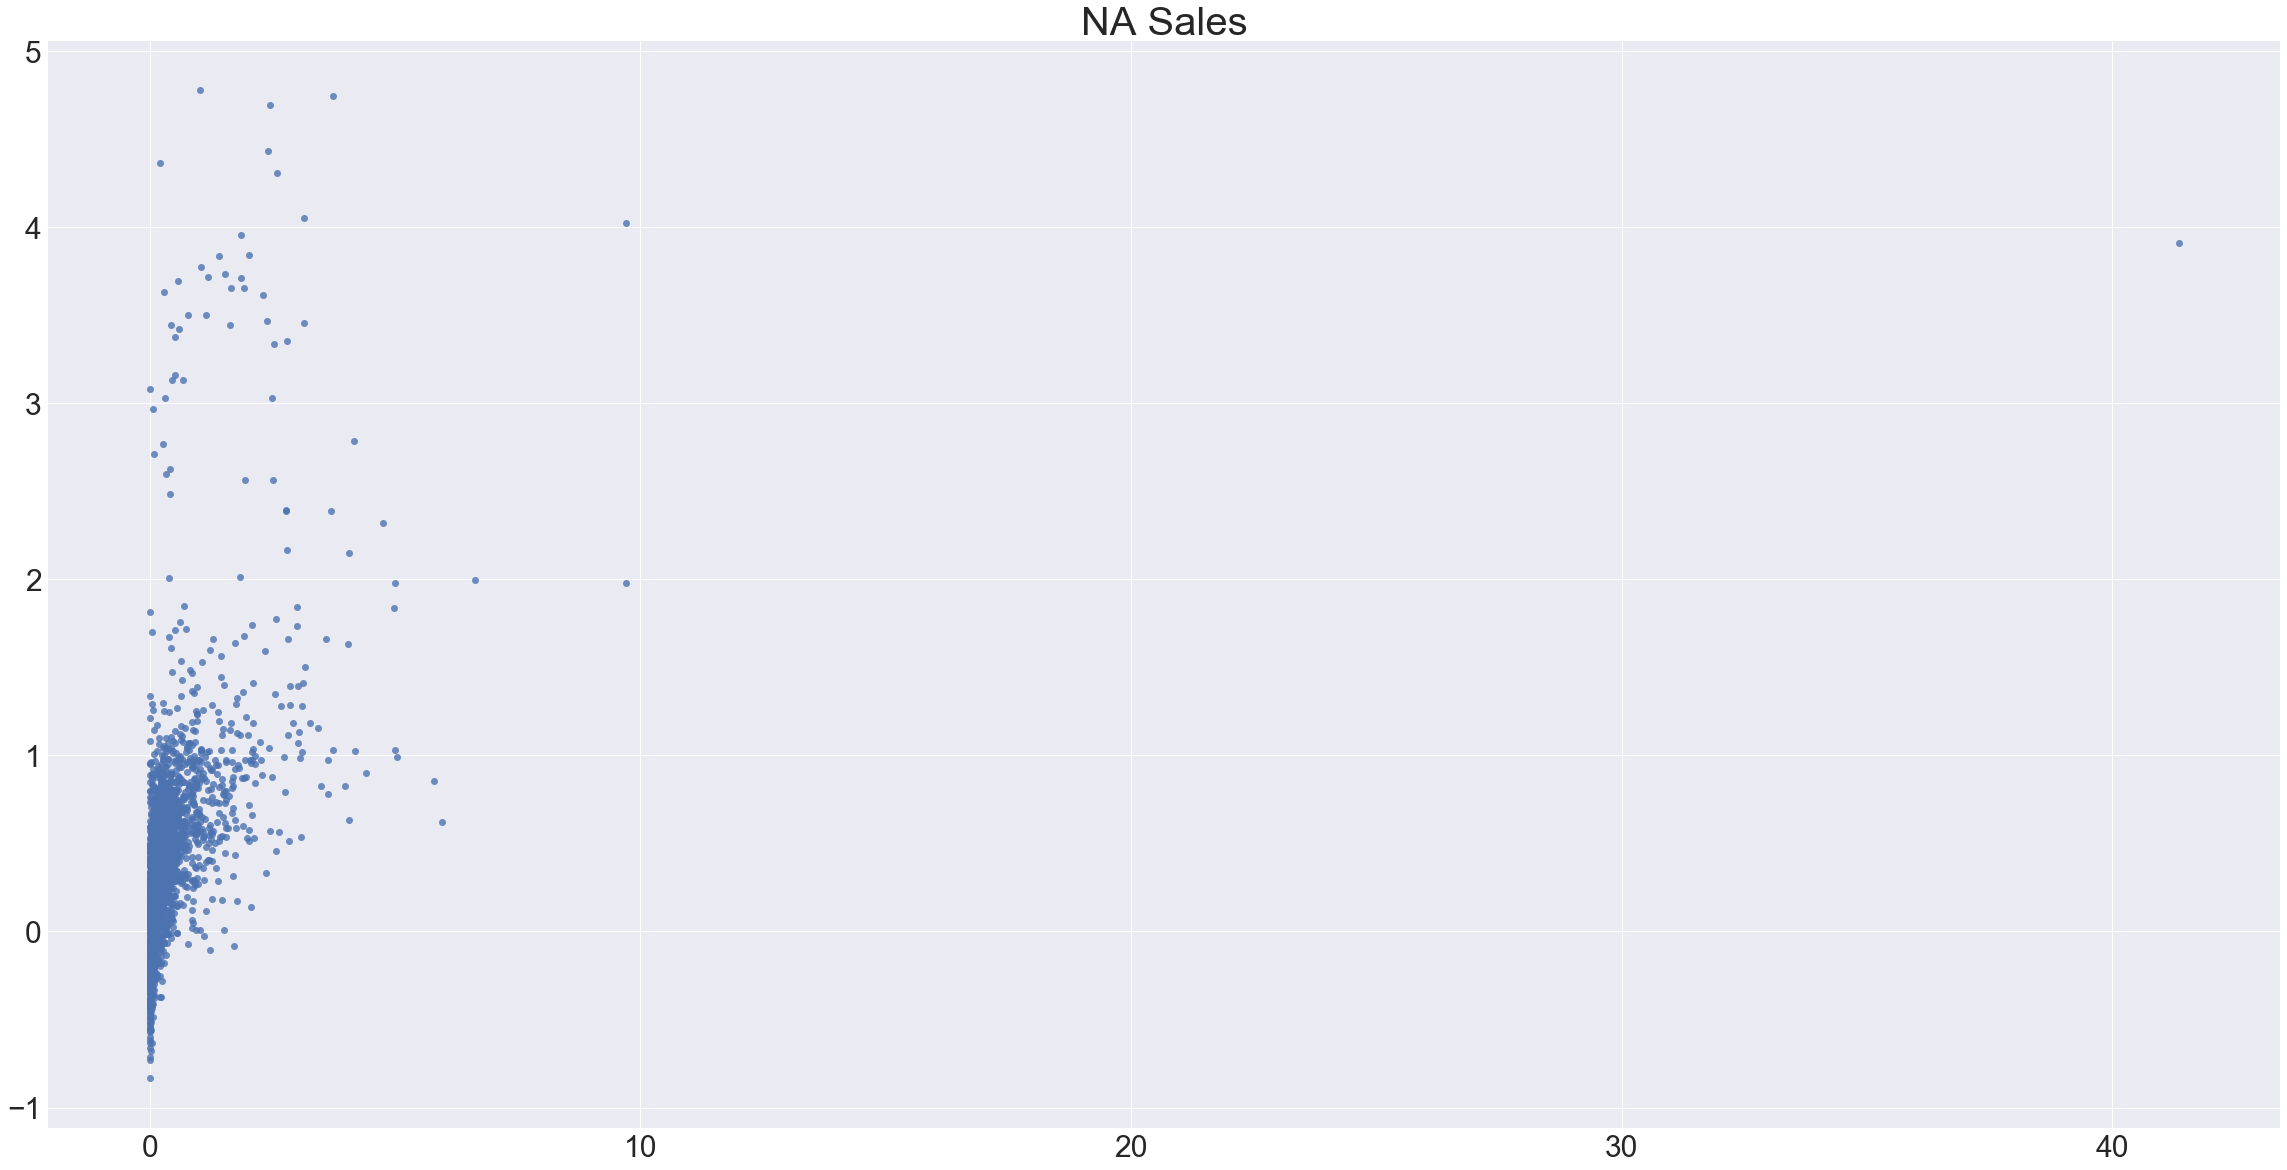

In [488]:
plt.figure(figsize=(40,20))
ax = sns.regplot(x=y_test, y=predictions, fit_reg=False)
ax.set_xlabel(xlabel='', fontsize=40)
ax.set_title(label='NA Sales', fontsize=40)

/Users/honza/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


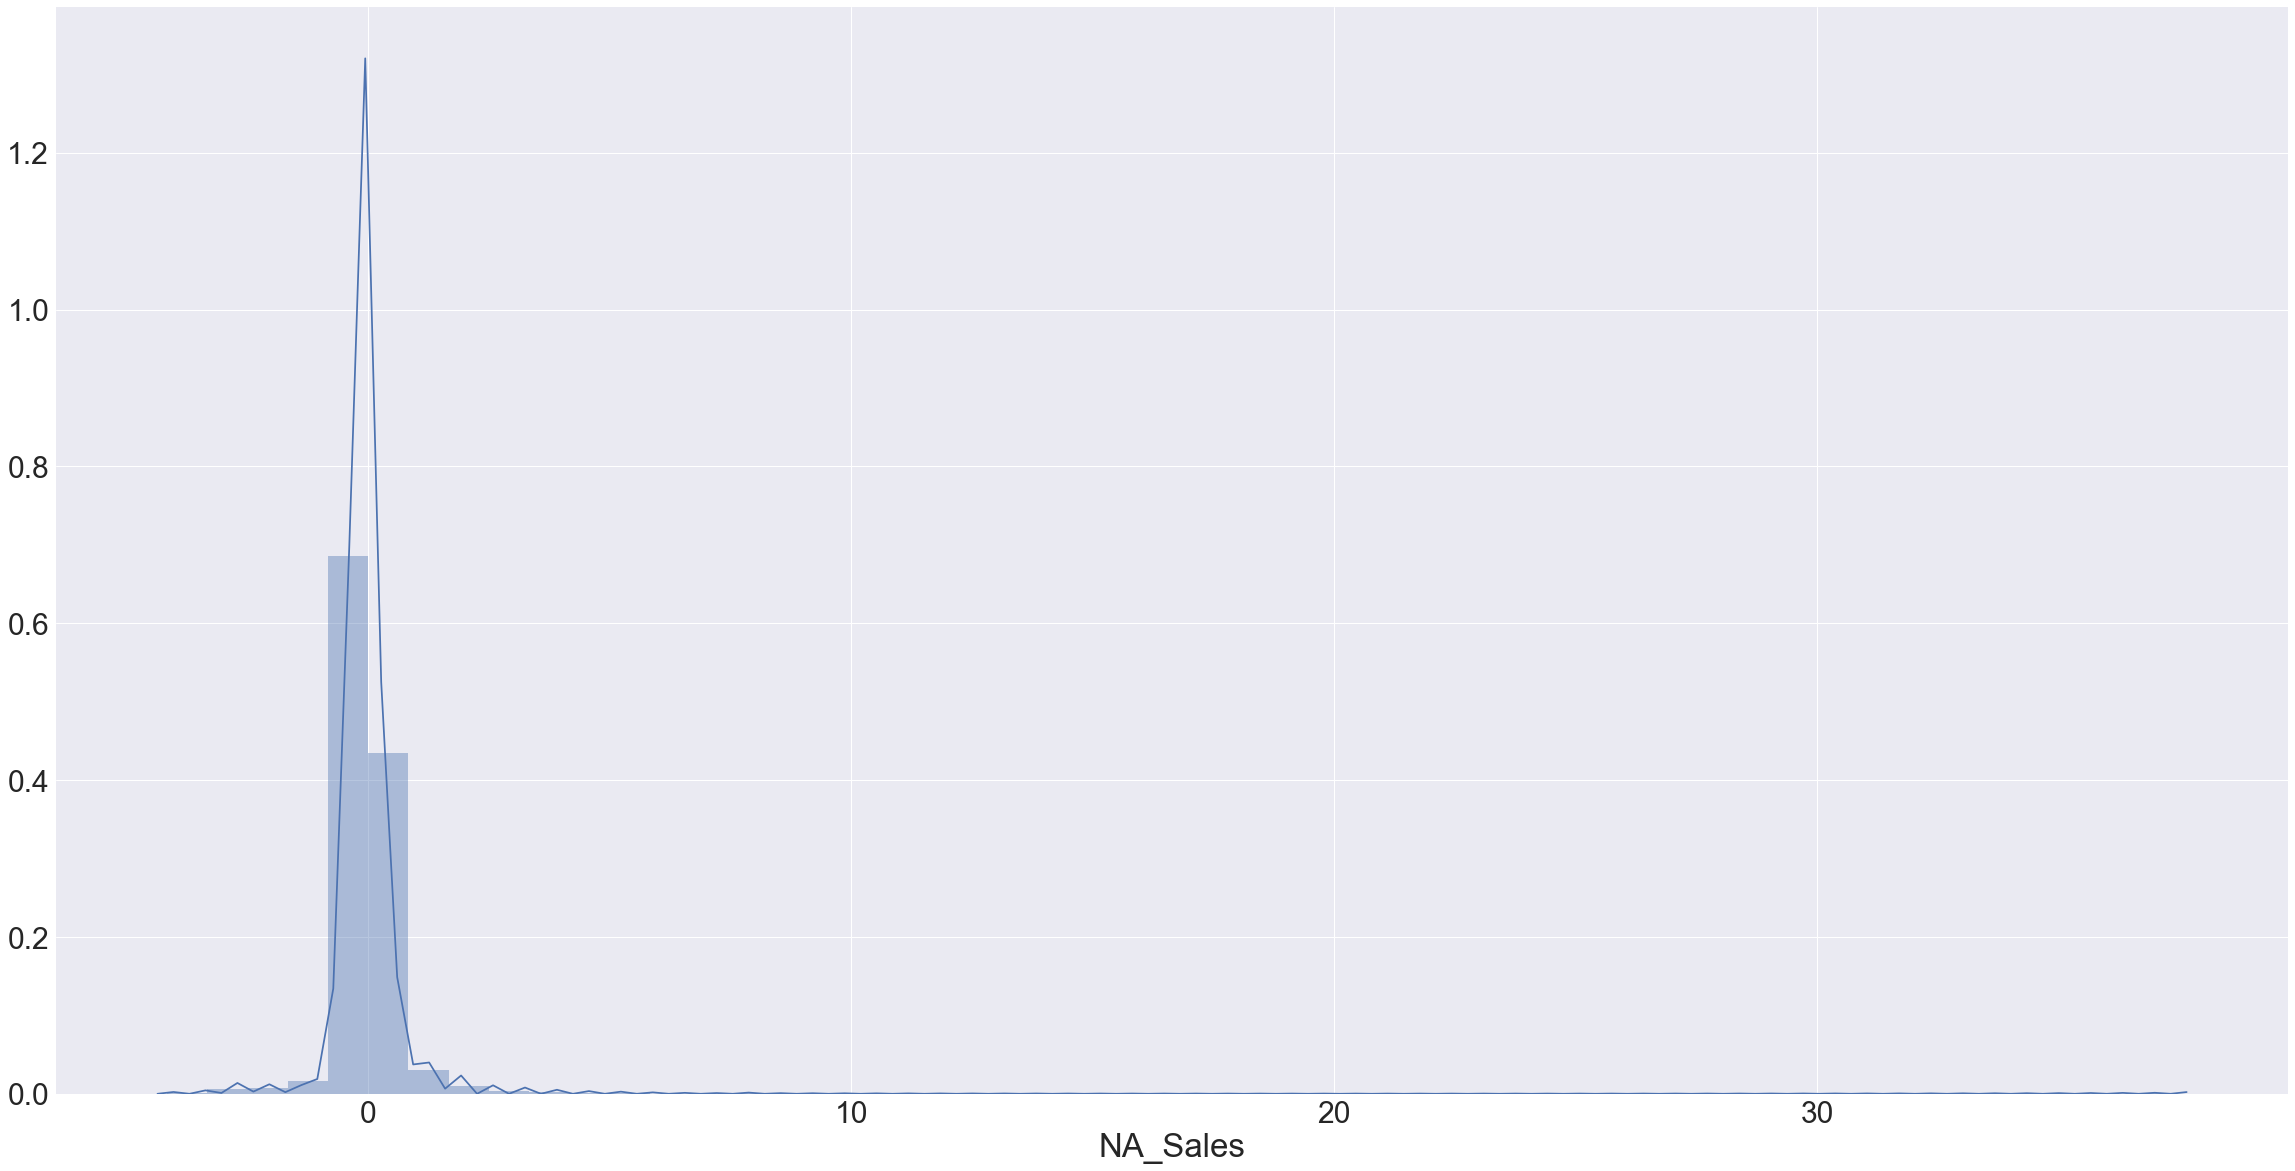

In [489]:
plt.figure(figsize=(40,20))
sns.distplot((y_test-predictions),bins=50);